# Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.cluster import SpectralClustering
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer
from plotly.offline import iplot
import plotly.graph_objs as go
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from yellowbrick.cluster import KElbowVisualizer
import warnings

warnings.filterwarnings("ignore")


# EDA

**Reading the data**

In [2]:
df = pd.read_csv(
    "https://raw.githubusercontent.com/ahmedbadawy11/Machine-Learning-tasks/main/data.csv",
    encoding="latin-1",
)
df


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


**Checking for NULL values**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [4]:
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

Text(0.5, 1.0, 'Ratio of missing values per columns')

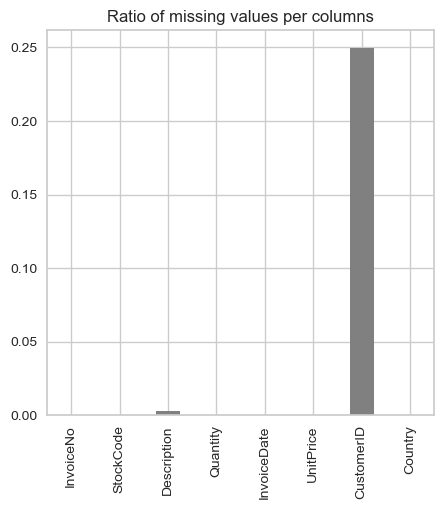

In [5]:
plt.figure(figsize=(5, 5))
df.isnull().mean(axis=0).plot.bar(color="grey")
plt.title("Ratio of missing values per columns")


In [6]:
nan_rows = df[df.isnull().T.any().T]
nan_rows.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,12/1/2010 11:52,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,12/1/2010 14:32,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,12/1/2010 14:32,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,12/1/2010 14:32,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,12/1/2010 14:32,1.66,NaN,United Kingdom


**Dropping the NULL values**

In [7]:
df = df.dropna(subset=["CustomerID"])

In [8]:
df.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

**Checking for duplicates and removing them**

In [9]:
print("Dupplicate entries: {}".format(df.duplicated().sum()))
df = df.drop_duplicates()
print("Dupplicate entries after dropping : {}".format(df.duplicated().sum()))


Dupplicate entries: 5225
Dupplicate entries after dropping : 0


**Exploring the countries**

In [10]:
print("Number of unique countries is : ", df.Country.nunique())


Number of unique countries is :  37


In [11]:
customer_country = df[["Country", "CustomerID"]].drop_duplicates()
customer_country.groupby(["Country"])["CustomerID"].aggregate(
    "count"
).reset_index().sort_values("CustomerID", ascending=False)


,Country,CustomerID
35,United Kingdom,3950
14,Germany,95
13,France,87
30,Spain,31
3,Belgium,25
32,Switzerland,21
26,Portugal,19
18,Italy,15
12,Finland,12
1,Austria,11


In [12]:
temp = (
    df[["CustomerID", "InvoiceNo", "Country"]]
    .groupby(["CustomerID", "InvoiceNo", "Country"])
    .count()
)
temp = temp.reset_index(drop=False)
countries = temp["Country"].value_counts()

data = dict(
    type="choropleth",
    locations=countries.index,
    locationmode="country names",
    z=countries,
    text=countries.index,
    colorbar={"title": "Order nb."},
    colorscale=[
        [0, "rgb(224,255,255)"],
        [0.01, "rgb(166,206,227)"],
        [0.02, "rgb(31,120,180)"],
        [0.03, "rgb(178,223,138)"],
        [0.05, "rgb(51,160,44)"],
        [0.10, "rgb(251,154,153)"],
        [0.20, "rgb(255,255,0)"],
        [1, "rgb(227,26,28)"],
    ],
    reversescale=False,
)
layout = dict(
    title="Number of orders per country",
    geo=dict(showframe=True, projection={"type": "mercator"}),
)
choromap = go.Figure(data=[data], layout=layout)
iplot(choromap, validate=False)


**Found negative values on the Quantity column**

In [13]:
df.describe()


,Quantity,UnitPrice,CustomerID
count,401604.000000,401604.000000,401604.000000
mean,12.183273,3.474064,15281.160818
std,250.283037,69.764035,1714.006089
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13939.000000
50%,5.000000,1.950000,15145.000000
75%,12.000000,3.750000,16784.000000
max,80995.000000,38970.000000,18287.000000


**We can see there is a "C" at the start of the InvoiceNo column**

In [14]:
df[(df["Quantity"] < 0)]


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,12/1/2010 9:41,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,12/1/2010 9:49,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,12/1/2010 10:24,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,12/9/2011 9:57,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,12/9/2011 10:28,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,12/9/2011 11:57,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,12/9/2011 11:58,1.25,17315.0,United Kingdom


**Create a column that contatins the number of products per transaction**

In [15]:
temp = df.groupby(by=["CustomerID", "InvoiceNo"], as_index=False)["InvoiceDate"].count()
nb_products_per_basket = temp.rename(columns={"InvoiceDate": "Number of products"})

In [16]:
temp_sorted = nb_products_per_basket.sort_values(
    by="Number of products", ascending=False
)

In [17]:
temp_sorted

,CustomerID,InvoiceNo,Number of products
6810,14096.0,576339,542
6812,14096.0,579196,533
6813,14096.0,580727,529
6811,14096.0,578270,442
6808,14096.0,573576,435
...,...,...,...
13192,15738.0,553847,1
6996,14145.0,559110,1
13200,15738.0,C538066,1
13201,15738.0,C543637,1


**Check for the percentage of cancelled orders**

In [18]:
nb_products_per_basket.InvoiceNo = nb_products_per_basket.InvoiceNo.astype(str)
nb_products_per_basket["order_canceled"] = nb_products_per_basket["InvoiceNo"].apply(
    lambda x: int(
        "C" in x
    )  # if the invoice number contains a C, the order was canceled
)
perc = (
    len(nb_products_per_basket[nb_products_per_basket["order_canceled"] == 1])
    / len(nb_products_per_basket)
    * 100
)
print("Percentage of total canceled orderover all orders : ", perc)

Percentage of total canceled orderover all orders :  16.466876971608833


In [19]:
nb_products_per_basket[nb_products_per_basket["order_canceled"] == 1][:5]


,CustomerID,InvoiceNo,Number of products,order_canceled
1,12346.0,C541433,1,1
23,12352.0,C545329,2,1
24,12352.0,C545330,1,1
25,12352.0,C547388,7,1
39,12359.0,C549955,2,1


**We can see a counterpart for cancelled orders**

In [20]:
df[df["CustomerID"] == 12346]


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,1/18/2011 10:01,1.04,12346.0,United Kingdom
61624,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,1/18/2011 10:17,1.04,12346.0,United Kingdom


In [21]:
df = df.copy(deep=True)
df["QuantityCanceled"] = 0

entry_to_remove = []
doubtfull_entry = []

for index, col in df.iterrows():
    if (col["Quantity"] > 0) or col["Description"] == "Discount":
        continue
    df_test = df[
        (df["CustomerID"] == col["CustomerID"])
        & (df["StockCode"] == col["StockCode"])
        & (df["InvoiceDate"] < col["InvoiceDate"])
        & (df["Quantity"] > 0)
    ].copy()
    # Cancelation WITHOUT counterpart
    if df_test.shape[0] == 0:
        doubtfull_entry.append(index)
    # Cancelation WITH a counterpart
    elif df_test.shape[0] == 1:
        index_order = df_test.index[0]
        df.loc[index_order, "QuantityCanceled"] = -col["Quantity"]
        entry_to_remove.append(index)
    # Various counterparts exist in orders so we delete the last one
    elif df_test.shape[0] > 1:
        df_test.sort_index(axis=0, ascending=False, inplace=True)
        for ind, val in df_test.iterrows():
            if val["Quantity"] < -col["Quantity"]:
                continue
            df.loc[ind, "QuantityCanceled"] = -col["Quantity"]
            entry_to_remove.append(index)
            break


In [22]:
print("entry_to_remove: {}".format(len(entry_to_remove)))
print("doubtfull_entry: {}".format(len(doubtfull_entry)))

entry_to_remove: 6151
doubtfull_entry: 2607


In [23]:
df = df.drop(entry_to_remove, axis=0)
df = df.drop(doubtfull_entry, axis=0)
remaining_entries = df[(df["Quantity"] < 0) & (df["StockCode"] != "D")]
print("Number of entries to delete: {}".format(remaining_entries.shape[0]))
remaining_entries[:5]


Number of entries to delete: 37


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,QuantityCanceled
27329,C538530,22630,DOLLY GIRL LUNCH BOX,-33,12/13/2010 10:26,1.95,14796.0,United Kingdom,0
32870,C539195,22942,CHRISTMAS LIGHTS 10 SANTAS,-5,12/16/2010 12:05,8.50,12748.0,United Kingdom,0
33085,C539221,22941,CHRISTMAS LIGHTS 10 REINDEER,-12,12/16/2010 12:56,8.50,14911.0,EIRE,0
33086,C539221,22942,CHRISTMAS LIGHTS 10 SANTAS,-10,12/16/2010 12:56,8.50,14911.0,EIRE,0
77599,C542744,22700,BLACK AND WHITE DOG BOWL,-10,1/31/2011 16:32,0.85,16191.0,United Kingdom,0


In [24]:
df[df["CustomerID"] == 15498].head(5)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,QuantityCanceled
14498,C537597,D,Discount,-1,12/7/2010 12:34,281.00,15498.0,United Kingdom,0
17612,537771,21232,STRAWBERRY CERAMIC TRINKET BOX,24,12/8/2010 12:29,1.25,15498.0,United Kingdom,0
17613,537771,22174,PHOTO CUBE,48,12/8/2010 12:29,1.48,15498.0,United Kingdom,0
17614,537771,21524,DOORMAT SPOTTY HOME SWEET HOME,20,12/8/2010 12:29,6.75,15498.0,United Kingdom,0
17615,537771,48173C,DOORMAT BLACK FLOCK,10,12/8/2010 12:29,6.75,15498.0,United Kingdom,0


**Discounts also have a negative Quantity**

In [25]:
df[df["Description"] == "Discount"].head(5)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,QuantityCanceled
141,C536379,D,Discount,-1,12/1/2010 9:41,27.50,14527.0,United Kingdom,0
9038,C537164,D,Discount,-1,12/5/2010 13:21,29.29,14527.0,United Kingdom,0
14498,C537597,D,Discount,-1,12/7/2010 12:34,281.00,15498.0,United Kingdom,0
19392,C537857,D,Discount,-1,12/8/2010 16:00,267.12,17340.0,United Kingdom,0
31134,C538897,D,Discount,-1,12/15/2010 9:14,5.76,16422.0,United Kingdom,0


In [26]:
df["Description"].value_counts()


WHITE HANGING HEART T-LIGHT HOLDER    2016
REGENCY CAKESTAND 3 TIER              1715
JUMBO BAG RED RETROSPOT               1617
ASSORTED COLOUR BIRD ORNAMENT         1395
PARTY BUNTING                         1391
                                      ... 
GREEN WITH METAL BAG CHARM               1
WHITE WITH METAL BAG CHARM               1
BLUE/NAT SHELL NECKLACE W PENDANT        1
PINK EASTER HENS+FLOWER                  1
PAPER CRAFT , LITTLE BIRDIE              1
Name: Description, Length: 3878, dtype: int64

In [27]:
df = df.drop(remaining_entries.index, axis=0)


**make a list of characters in the StockCode column**

In [28]:
list_special_codes = df[df["StockCode"].str.contains("^[a-zA-Z]+", regex=True)][
    "StockCode"
].unique()
list_special_codes


array(['POST', 'D', 'C2', 'M', 'BANK CHARGES', 'PADS', 'DOT'],
      dtype=object)

In [29]:
df = df[~df["StockCode"].isin(["POST", "D", "C2", "M", "BANK CHARGES", "PADS", "DOT"])]

In [30]:
df.describe()

,Quantity,UnitPrice,CustomerID,QuantityCanceled
count,391183.000000,391183.000000,391183.000000,391183.000000
mean,13.179665,2.874130,15295.083503,0.583911
std,181.907403,4.284639,1710.359579,175.868790
min,1.000000,0.000000,12346.000000,0.000000
25%,2.000000,1.250000,13969.000000,0.000000
50%,6.000000,1.950000,15158.000000,0.000000
75%,12.000000,3.750000,16794.000000,0.000000
max,80995.000000,649.500000,18287.000000,80995.000000


In [31]:
df[(df["CustomerID"] == 17897) & (df["Description"] == "JAM MAKING SET WITH JARS")]


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,QuantityCanceled
884,536488,22960,JAM MAKING SET WITH JARS,8,12/1/2010 12:31,4.25,17897.0,United Kingdom,6


In [32]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,QuantityCanceled
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,0
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,0
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France,0
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France,0
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France,0
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France,0


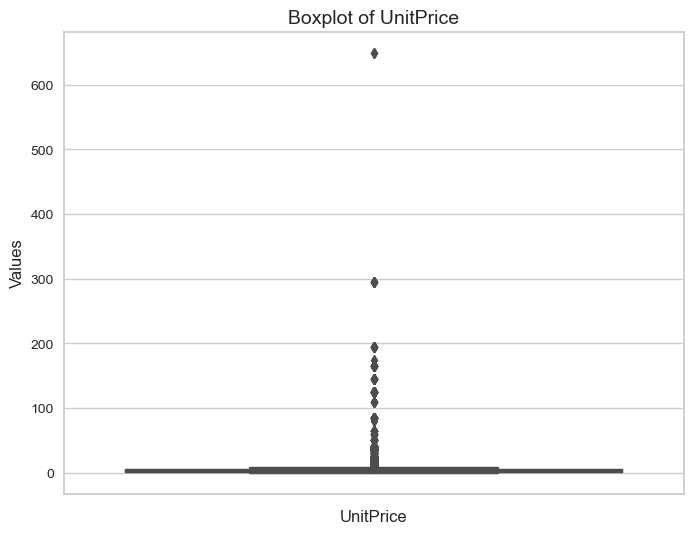

In [33]:
plt.figure(figsize=(8, 6))
sns.boxplot(y="UnitPrice", data=df, color="grey")
plt.title("Boxplot of UnitPrice", fontsize=14)
plt.xlabel("UnitPrice", fontsize=12)
plt.ylabel("Values", fontsize=12)
plt.show()


# Feature Engineering

**Create a new column with total price of each order**

In [34]:
df["TotalPrice"] = df["UnitPrice"] * (df["Quantity"] - df["QuantityCanceled"])


**Label encoding the values of the country column**

In [35]:
le = LabelEncoder()
df["Country"] = le.fit_transform(df["Country"])


In [36]:
df


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,QuantityCanceled,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,35,0,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,35,0,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,35,0,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,35,0,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,35,0,20.34
...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,13,0,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,13,0,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,13,0,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,13,0,16.60


# RFM

**Get the value of the most recent transaction**

In [37]:
type(df["InvoiceDate"].min())

str

In [38]:
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])


In [39]:
df["InvoiceDate"].min()


Timestamp('2010-12-01 08:26:00')

In [40]:
df["InvoiceDate"].max()


Timestamp('2011-12-09 12:50:00')

In [41]:
NOW = dt.datetime(2011, 12, 10)


**Create RFM table**

In [42]:
custom_aggregation = {}
custom_aggregation["InvoiceDate"] = lambda x: x.iloc[0]
custom_aggregation["CustomerID"] = lambda x: x.iloc[0]
custom_aggregation["TotalPrice"] = "sum"
rfmTable = df.groupby("InvoiceNo").agg(custom_aggregation)


**Calculate Recency by subtracting the max date from the date of the transaction.**

In [43]:
rfmTable["Recency"] = NOW - rfmTable["InvoiceDate"]
rfmTable["Recency"] = pd.to_timedelta(rfmTable["Recency"]).astype("timedelta64[D]")

In [44]:
rfmTable.head(5)


,InvoiceDate,CustomerID,TotalPrice,Recency
InvoiceNo,,,,
536365,2010-12-01 08:26:00,17850.0,139.12,373.0
536366,2010-12-01 08:28:00,17850.0,22.20,373.0
536367,2010-12-01 08:34:00,13047.0,278.73,373.0
536368,2010-12-01 08:34:00,13047.0,70.05,373.0
536369,2010-12-01 08:35:00,13047.0,17.85,373.0


**Calculating Frequency and Monetary Value of Customers**

In [45]:
custom_aggregation = {}

custom_aggregation["Recency"] = ["min", "max"]
custom_aggregation["InvoiceDate"] = lambda x: len(x)
custom_aggregation["TotalPrice"] = "sum"

rfmTable = rfmTable.groupby("CustomerID").agg(custom_aggregation)


In [46]:
rfmTable.columns = ["min_recency", "max_recency", "frequency", "monetary_value"]

In [47]:
rfmTable.head(5)


,min_recency,max_recency,frequency,monetary_value
CustomerID,,,,
12346.0,325.0,325.0,1,0.00
12347.0,2.0,367.0,7,4310.00
12348.0,75.0,358.0,4,1437.24
12349.0,18.0,18.0,1,1457.55
12350.0,310.0,310.0,1,294.40


In [48]:
df["CustomerID"] = df["CustomerID"].astype("int")


In [49]:
quantiles = rfmTable.quantile(q=[0.25, 0.5, 0.75])
quantiles = quantiles.to_dict()


In [50]:
quantiles


{'min_recency': {0.25: 17.0, 0.5: 50.0, 0.75: 142.0},
 'max_recency': {0.25: 112.0, 0.5: 248.0, 0.75: 326.0},
 'frequency': {0.25: 1.0, 0.5: 2.0, 0.75: 5.0},
 'monetary_value': {0.25: 299.655, 0.5: 653.24, 0.75: 1611.7}}

In [51]:
segmented_rfm = rfmTable


**Giving RFM scores based on the quantiles**

In [52]:
def RScore(x, p, d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]:
        return 3
    else:
        return 4


In [53]:
def FMScore(x, p, d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]:
        return 2
    else:
        return 1


In [54]:
segmented_rfm["r_quartile"] = segmented_rfm["min_recency"].apply(
    RScore,
    args=(
        "min_recency",
        quantiles,
    ),
)
segmented_rfm["f_quartile"] = segmented_rfm["frequency"].apply(
    FMScore,
    args=(
        "frequency",
        quantiles,
    ),
)
segmented_rfm["m_quartile"] = segmented_rfm["monetary_value"].apply(
    FMScore,
    args=(
        "monetary_value",
        quantiles,
    ),
)
segmented_rfm.head()


,min_recency,max_recency,frequency,monetary_value,r_quartile,f_quartile,m_quartile
CustomerID,,,,,,,
12346.0,325.0,325.0,1,0.00,4,4,4
12347.0,2.0,367.0,7,4310.00,1,1,1
12348.0,75.0,358.0,4,1437.24,3,2,2
12349.0,18.0,18.0,1,1457.55,2,4,2
12350.0,310.0,310.0,1,294.40,4,4,4


**Adding them into one column**

In [55]:
segmented_rfm["RFMScore"] = (
    segmented_rfm.r_quartile.map(str)
    + segmented_rfm.f_quartile.map(str)
    + segmented_rfm.m_quartile.map(str)
)
segmented_rfm.head()


,min_recency,max_recency,frequency,monetary_value,r_quartile,f_quartile,m_quartile,RFMScore
CustomerID,,,,,,,,
12346.0,325.0,325.0,1,0.00,4,4,4,444
12347.0,2.0,367.0,7,4310.00,1,1,1,111
12348.0,75.0,358.0,4,1437.24,3,2,2,322
12349.0,18.0,18.0,1,1457.55,2,4,2,242
12350.0,310.0,310.0,1,294.40,4,4,4,444


In [56]:
segmented_rfm = segmented_rfm.reset_index()

In [57]:
segmented_rfm.head(5)

,CustomerID,min_recency,max_recency,frequency,monetary_value,r_quartile,f_quartile,m_quartile,RFMScore
0,12346.0,325.0,325.0,1,0.00,4,4,4,444
1,12347.0,2.0,367.0,7,4310.00,1,1,1,111
2,12348.0,75.0,358.0,4,1437.24,3,2,2,322
3,12349.0,18.0,18.0,1,1457.55,2,4,2,242
4,12350.0,310.0,310.0,1,294.40,4,4,4,444


In [58]:
segmented_rfm["RFMScore"] = segmented_rfm["RFMScore"].astype(int)

In [59]:
segmented_rfm["RFMScore"]

0       444
1       111
2       322
3       242
4       444
       ... 
4330    444
4331    444
4332    134
4333    111
4334    221
Name: RFMScore, Length: 4335, dtype: int32

**Our customer segments**

In [60]:
segmented_rfm["RFMScore"].value_counts().head(10)

111    456
444    447
443    218
344    207
222    190
211    184
122    170
322    159
343    147
244    145
Name: RFMScore, dtype: int64

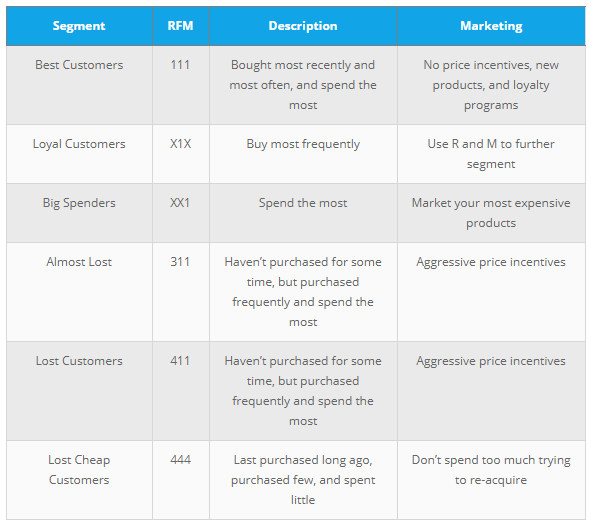

In [61]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,QuantityCanceled,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,35,0,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,35,0,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,35,0,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,35,0,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,35,0,20.34
...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,13,0,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,13,0,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,13,0,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,13,0,16.60


**Merge both dataframes**

In [62]:
df = pd.merge(df, segmented_rfm, on="CustomerID")
df = df.drop(columns=["r_quartile", "f_quartile", "m_quartile"])


In [63]:
df.columns


Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'QuantityCanceled', 'TotalPrice',
       'min_recency', 'max_recency', 'frequency', 'monetary_value',
       'RFMScore'],
      dtype='object')

**Drop unwanted columns**

In [64]:
df = df.drop(
    columns=[
        "InvoiceNo",
        "StockCode",
        "Description",
        "Quantity",
        "InvoiceDate",
        "UnitPrice",
        "Country",
        "QuantityCanceled",
        "TotalPrice",
        "RFMScore",
    ]
)


In [65]:
df = df.set_index("CustomerID")

In [66]:
df.columns

Index(['min_recency', 'max_recency', 'frequency', 'monetary_value'], dtype='object')

**Final dataframe**

In [67]:
df


,min_recency,max_recency,frequency,monetary_value
CustomerID,,,,
17850,372.0,373.0,34,5322.84
17850,372.0,373.0,34,5322.84
17850,372.0,373.0,34,5322.84
17850,372.0,373.0,34,5322.84
17850,372.0,373.0,34,5322.84
...,...,...,...,...
12713,0.0,0.0,1,794.55
12713,0.0,0.0,1,794.55
12713,0.0,0.0,1,794.55


In [68]:
df.duplicated().sum()

386849

In [69]:
df = df.drop_duplicates()
df

,min_recency,max_recency,frequency,monetary_value
CustomerID,,,,
17850,372.0,373.0,34,5322.84
13047,56.0,373.0,9,3105.70
12583,2.0,373.0,15,6690.18
13748,95.0,373.0,5,948.25
15100,333.0,373.0,3,843.15
...,...,...,...,...
13436,1.0,1.0,1,196.89
15520,1.0,1.0,1,343.50
13298,1.0,1.0,1,360.00


# Modeling

**Scaling the data**

In [70]:
X1 = df

scaler = StandardScaler()
X1 = scaler.fit_transform(X1)

## K-Means

**Get best K**

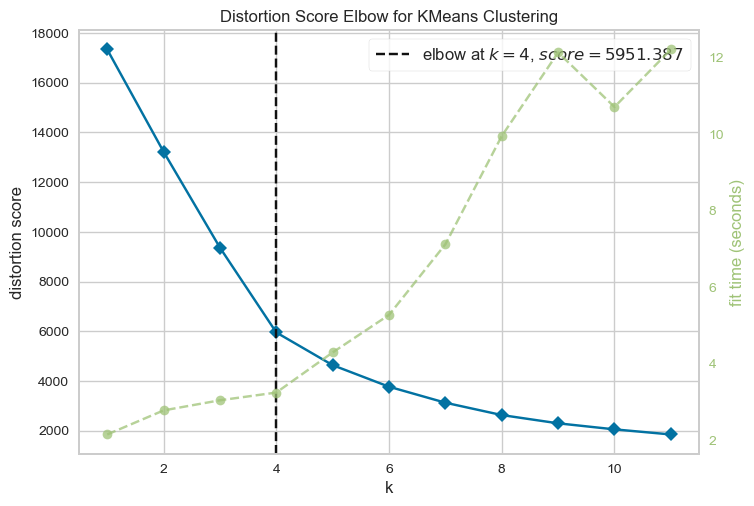

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [71]:
inertias = []
kc = KMeans(n_clusters=4, random_state=42)
visualizer = KElbowVisualizer(kc, k=(1, 12), colors="red", bg="grey")
visualizer.fit(X1)
visualizer.show()


**Silhouette score for range(2,12)**

In [72]:
K = range(2, 12)
sil = []  # Store silhouette scores for each k
for k in K:
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(X1)
    score = silhouette_score(X1, model.labels_)
    print(f"Silhouette Score for {k} clusters: {score}")
    sil.append(score)


Silhouette Score for 2 clusters: 0.35436938523600764
Silhouette Score for 3 clusters: 0.40439718240901357
Silhouette Score for 4 clusters: 0.5078214548070824
Silhouette Score for 5 clusters: 0.5102786946605287
Silhouette Score for 6 clusters: 0.5080332193101955
Silhouette Score for 7 clusters: 0.5068417430291118
Silhouette Score for 8 clusters: 0.4691072535005318
Silhouette Score for 9 clusters: 0.4261972014109684
Silhouette Score for 10 clusters: 0.4271032503189583
Silhouette Score for 11 clusters: 0.4241625818272906


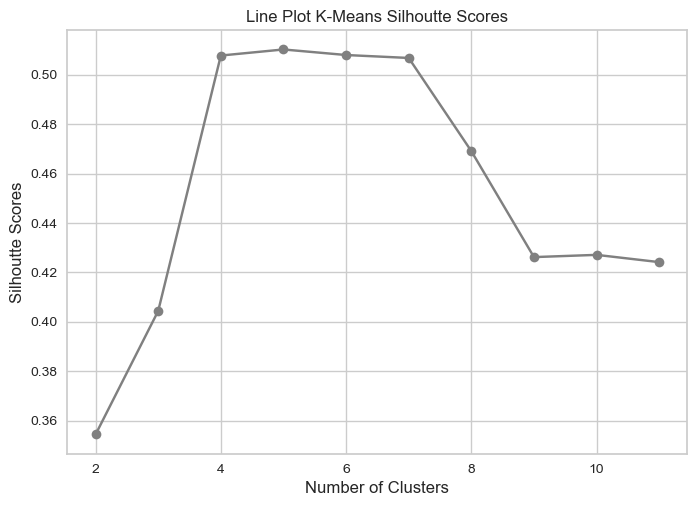

In [73]:
x_values = range(2, 12)
plt.plot(x_values, sil, marker="o", linestyle="-", color="grey")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhoutte Scores")
plt.title("Line Plot K-Means Silhoutte Scores")
plt.show()


n_clusters = 4


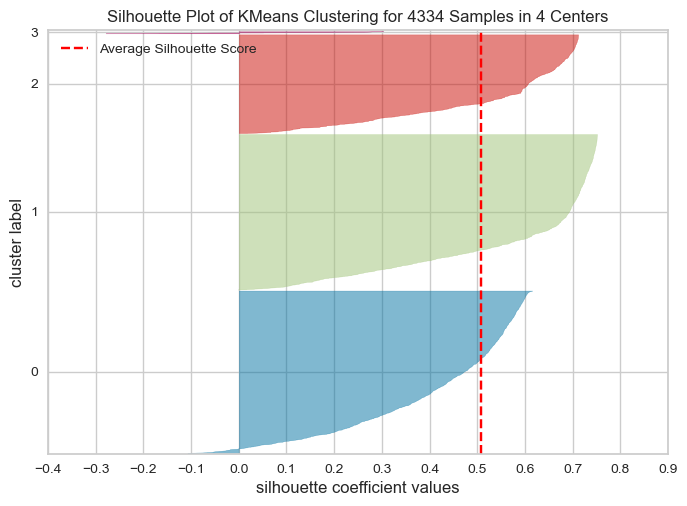

silhoutte score 0.5078214548070824


In [74]:
print("n_clusters =", 4)
kmeans = KMeans(n_clusters=4, random_state=42)
visualizer = SilhouetteVisualizer(kmeans, colors="yellowbrick")
visualizer.fit(X1)
visualizer.show()
clusters = kmeans.predict(X1)
silhouette_avg = silhouette_score(X1, clusters)
print("silhoutte score", silhouette_avg)


**Display number of customers per cluster**

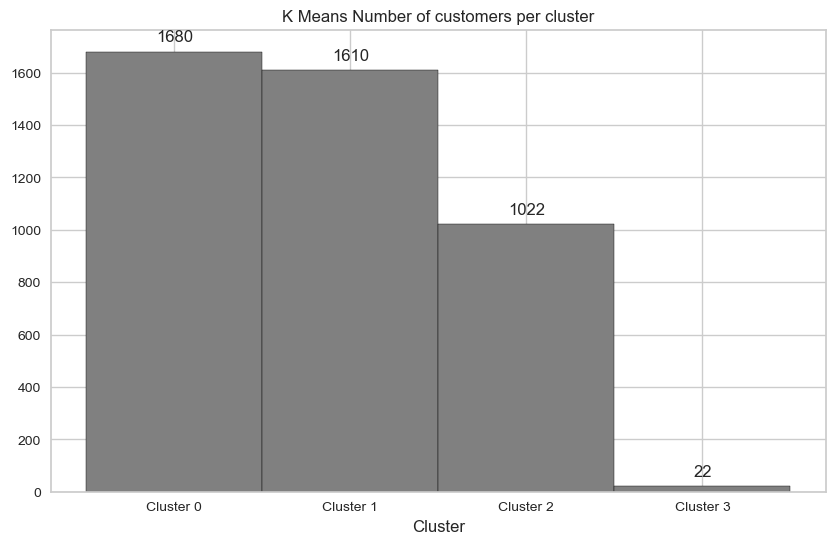

In [75]:
plt.figure(figsize=(10, 6))

n, bins, patches = plt.hist(
    clusters, bins=4, align="mid", color="grey", edgecolor="black"
)

plt.xlabel("Cluster")
plt.title("K Means Number of customers per cluster")
plt.xticks(
    [rect.get_x() + rect.get_width() / 2 for rect in patches],
    ["Cluster {}".format(x) for x in range(4)],
)

for rect in patches:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2

    space = 5
    va = "bottom"
    label = str(int(y_value))

    plt.annotate(
        label,
        (x_value, y_value),
        xytext=(0.2, space),
        textcoords="offset points",
        ha="center",
        va=va,
    )

plt.show()


In [76]:
df["cluster"] = clusters
df

,min_recency,max_recency,frequency,monetary_value,cluster
CustomerID,,,,,
17850,372.0,373.0,34,5322.84,2
13047,56.0,373.0,9,3105.70,0
12583,2.0,373.0,15,6690.18,0
13748,95.0,373.0,5,948.25,0
15100,333.0,373.0,3,843.15,2
...,...,...,...,...,...
13436,1.0,1.0,1,196.89,1
15520,1.0,1.0,1,343.50,1
13298,1.0,1.0,1,360.00,1


**Display the summary statistics**

In [77]:
summary = df.groupby("cluster")["min_recency"].describe()
print(summary)
print()
summary = df.groupby("cluster")["frequency"].describe()
print(summary)
print()
summary = df.groupby("cluster")["monetary_value"].describe()
print(summary)


          count        mean        std    min    25%    50%     75%    max
cluster                                                                   
0        1680.0   36.597024  34.530892    0.0    9.0   24.0   57.00  163.0
1        1610.0   49.839752  41.137256    0.0   17.0   39.0   72.75  165.0
2        1022.0  252.313112  64.948151  130.0  197.0  247.0  303.00  373.0
3          22.0    5.818182   9.338279    0.0    1.0    2.0    7.00   38.0

          count       mean        std   min   25%   50%   75%    max
cluster                                                             
0        1680.0   7.139881   6.102760   2.0   3.0   5.0   9.0   55.0
1        1610.0   1.954037   1.401987   1.0   1.0   1.0   2.0   13.0
2        1022.0   1.605675   1.477910   1.0   1.0   1.0   2.0   34.0
3          22.0  73.727273  48.273212  20.0  46.5  58.5  89.0  206.0

          count          mean           std       min         25%        50%  \
cluster                                               

**TSNE for K-Means**

Text(0.5, 1.0, 'Visualization of the K-Means clustering with TSNE')

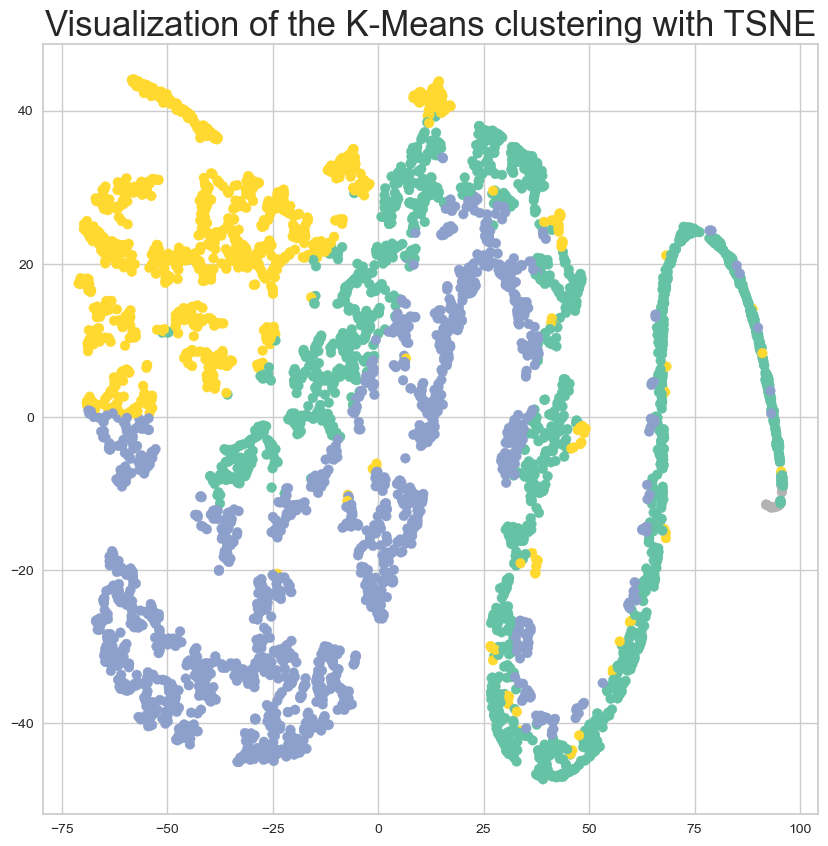

In [78]:
tsne = TSNE(n_components=2)
proj = tsne.fit_transform(df)

plt.figure(figsize=(10, 10))
plt.scatter(proj[:, 0], proj[:, 1], c=clusters, cmap="Set2")
plt.title("Visualization of the K-Means clustering with TSNE", fontsize="25")


## DBSCAN

**TSNE for default BSCAN**

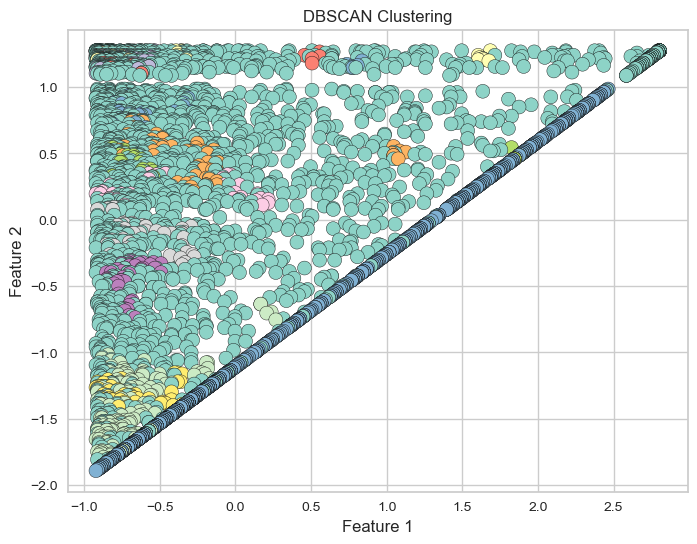

In [79]:
dbscan = DBSCAN(eps=0.08)
clusters = dbscan.fit_predict(X1)

cmap = plt.get_cmap("tab10")
plt.figure(figsize=(8, 6))
plt.scatter(X1[:, 0], X1[:, 1], c=clusters, cmap="Set3", s=100, edgecolors="k")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("DBSCAN Clustering")
plt.show()


**Bar graph for default DBSCAN**

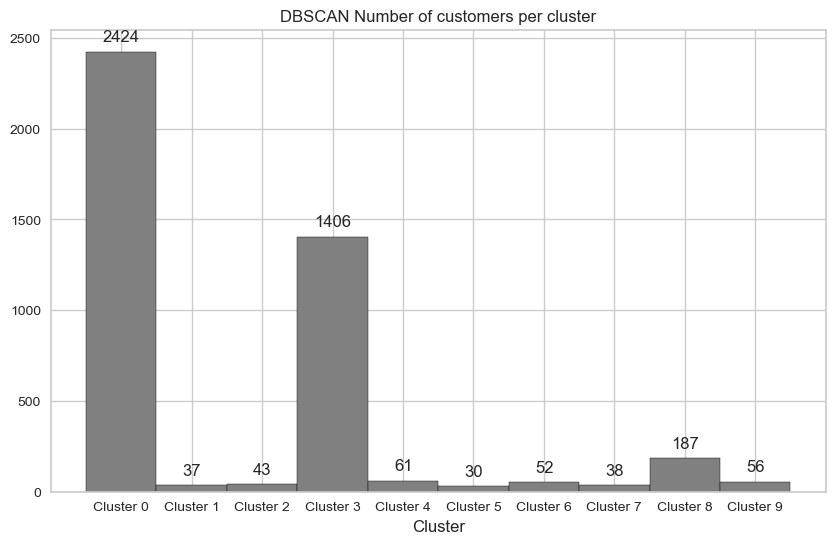

In [80]:
plt.figure(figsize=(10, 6))

n, bins, patches = plt.hist(
    clusters, bins=10, align="mid", color="grey", edgecolor="black"
)

plt.xlabel("Cluster")
plt.title("DBSCAN Number of customers per cluster")
plt.xticks(
    [rect.get_x() + rect.get_width() / 2 for rect in patches],
    ["Cluster {}".format(x) for x in range(10)],
)

for rect in patches:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2

    space = 5
    va = "bottom"
    label = str(int(y_value))

    plt.annotate(
        label,
        (x_value, y_value),
        xytext=(0.2, space),
        textcoords="offset points",
        ha="center",
        va=va,
    )

plt.show()


**Finding best parameters for DBSCAN**

In [81]:
best_eps = 0
best_min_samples = 0
best_score = -1

for eps in [0.003, 0.03, 0.02, 0.01]:
    for min_samples in range(2, 6):
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        clusters = dbscan.fit_predict(X1)
        silhouette_avg = silhouette_score(X1, clusters)
        if silhouette_avg > best_score:
            best_score = silhouette_avg
            best_eps = eps
            best_min_samples = min_samples

print("Best eps:", best_eps)
print("Best min_samples:", best_min_samples)


Best eps: 0.03
Best min_samples: 5


**TSNE for Tuned Model**

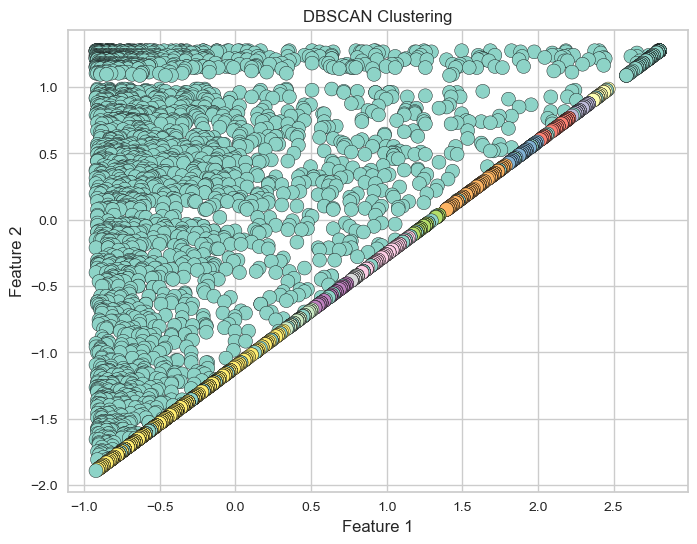

In [82]:
dbscan = DBSCAN(eps=0.03, min_samples=5)
clusters = dbscan.fit_predict(X1)

cmap = plt.get_cmap("tab10")
plt.figure(figsize=(8, 6))
plt.scatter(X1[:, 0], X1[:, 1], c=clusters, cmap="Set3", s=100, edgecolors="k")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("DBSCAN Clustering")
plt.show()

**Bar graph for tuned model**

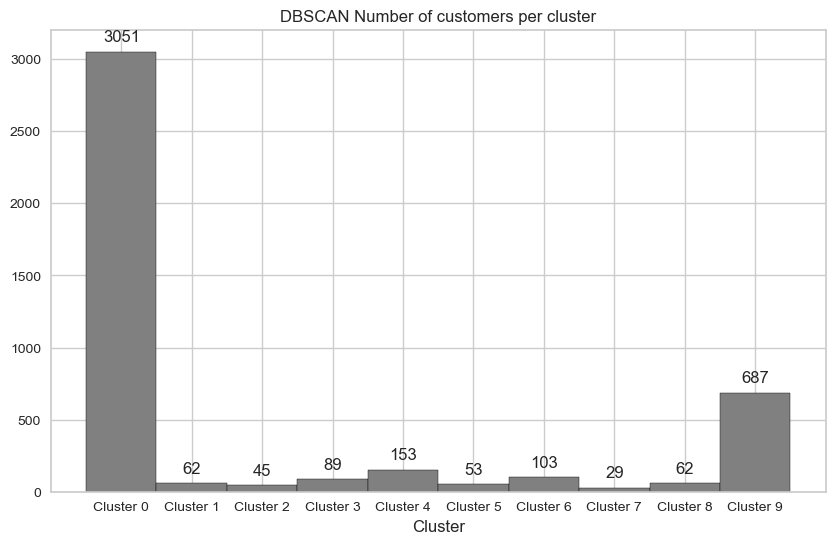

In [83]:
plt.figure(figsize=(10, 6))

n, bins, patches = plt.hist(
    clusters, bins=10, align="mid", color="grey", edgecolor="black"
)

plt.xlabel("Cluster")
plt.title("DBSCAN Number of customers per cluster")
plt.xticks(
    [rect.get_x() + rect.get_width() / 2 for rect in patches],
    ["Cluster {}".format(x) for x in range(10)],
)

for rect in patches:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2

    space = 5
    va = "bottom"
    label = str(int(y_value))

    plt.annotate(
        label,
        (x_value, y_value),
        xytext=(0.2, space),
        textcoords="offset points",
        ha="center",
        va=va,
    )

plt.show()


In [84]:
df["cluster"] = clusters
df


,min_recency,max_recency,frequency,monetary_value,cluster
CustomerID,,,,,
17850,372.0,373.0,34,5322.84,-1
13047,56.0,373.0,9,3105.70,-1
12583,2.0,373.0,15,6690.18,-1
13748,95.0,373.0,5,948.25,-1
15100,333.0,373.0,3,843.15,-1
...,...,...,...,...,...
13436,1.0,1.0,1,196.89,15
15520,1.0,1.0,1,343.50,15
13298,1.0,1.0,1,360.00,15


**Display the summary statistics**

In [85]:
summary = df.groupby("cluster")["min_recency"].describe()
print(summary)
print()
summary = df.groupby("cluster")["frequency"].describe()
print(summary)
print()
summary = df.groupby("cluster")["monetary_value"].describe()
print(summary)
#

          count        mean        std    min     25%    50%     75%    max
cluster                                                                    
-1       2944.0   62.563179  74.768625    0.0   11.00   31.0   81.00  373.0
 0        107.0  365.457944   6.248442  351.0  361.00  366.0  372.00  373.0
 1         25.0  332.760000   2.905168  329.0  330.00  332.0  334.00  339.0
 2         37.0  320.972973   3.227370  315.0  318.00  320.0  324.00  326.0
 3         45.0  307.777778   3.740982  301.0  304.00  309.0  311.00  313.0
 4         13.0  295.769231   1.300887  294.0  295.00  296.0  297.00  298.0
 5         76.0  281.907895   5.694858  273.0  276.75  282.0  287.25  292.0
 6        153.0  251.254902  11.670661  232.0  241.00  252.0  262.00  271.0
 7         15.0  225.800000   0.861892  225.0  225.00  226.0  226.50  227.0
 8         38.0  215.000000   2.931654  210.0  212.25  215.0  218.00  220.0
 9         79.0  190.113924   9.408108  176.0  183.00  189.0  198.50  207.0
 10        2

## Spectral Clustering

**Silhouette score for range(2,12)**

In [86]:
K = range(2, 12)
sil_spectral = []
for k in K:
    clustering = SpectralClustering(
        n_clusters=k, assign_labels="discretize", random_state=42
    )
    clustering.fit(X1)
    labels = clustering.labels_
    score = silhouette_score(X1, labels)
    print(f"Silhouette Score for {k} clusters: {score}")
    sil_spectral.append(score)


Silhouette Score for 2 clusters: 0.9068837420541243
Silhouette Score for 3 clusters: 0.8585742936247328
Silhouette Score for 4 clusters: 0.8169723724951269
Silhouette Score for 5 clusters: 0.7721495918909277
Silhouette Score for 6 clusters: 0.41832559814403386
Silhouette Score for 7 clusters: 0.42057020081208835
Silhouette Score for 8 clusters: 0.5069976758061598
Silhouette Score for 9 clusters: 0.7265244487115476
Silhouette Score for 10 clusters: 0.7404883720527325
Silhouette Score for 11 clusters: 0.40180952047619245


**Plot silhouette scores for each k value**

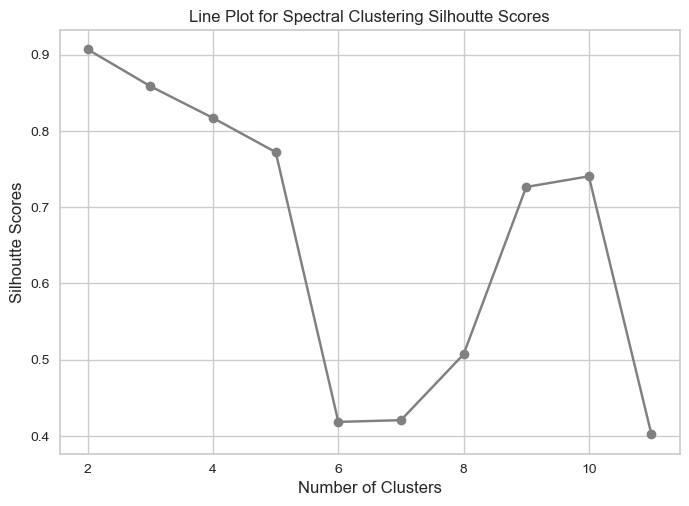

In [87]:
x_values = range(2, 12)

plt.plot(x_values, sil_spectral, marker="o", linestyle="-", color="grey")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhoutte Scores")
plt.title("Line Plot for Spectral Clustering Silhoutte Scores")
plt.show()


In [88]:
clustering = SpectralClustering(
    n_clusters=4, assign_labels="discretize", random_state=42
)
clustering.fit(X1)
labels = clustering.labels_
score = silhouette_score(X1, labels)
print(f"Silhouette Score for {4} clusters: {score}")


Silhouette Score for 4 clusters: 0.8592749501541268


**Display number of customers per cluster**

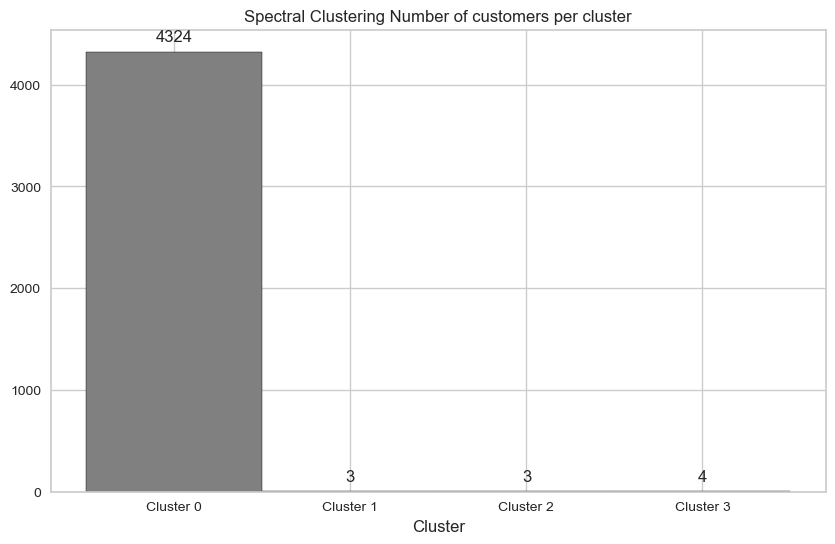

In [89]:
plt.figure(figsize=(10, 6))

n, bins, patches = plt.hist(
    labels, bins=4, align="mid", color="grey", edgecolor="black"
)

plt.xlabel("Cluster")
plt.title("Spectral Clustering Number of customers per cluster")
plt.xticks(
    [rect.get_x() + rect.get_width() / 2 for rect in patches],
    ["Cluster {}".format(x) for x in range(4)],
)

for rect in patches:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2

    space = 5
    va = "bottom"
    label = str(int(y_value))

    plt.annotate(
        label,
        (x_value, y_value),
        xytext=(0.2, space),
        textcoords="offset points",
        ha="center",
        va=va,
    )

plt.show()


In [90]:
df["cluster"] = labels
df

,min_recency,max_recency,frequency,monetary_value,cluster
CustomerID,,,,,
17850,372.0,373.0,34,5322.84,0
13047,56.0,373.0,9,3105.70,0
12583,2.0,373.0,15,6690.18,0
13748,95.0,373.0,5,948.25,0
15100,333.0,373.0,3,843.15,0
...,...,...,...,...,...
13436,1.0,1.0,1,196.89,0
15520,1.0,1.0,1,343.50,0
13298,1.0,1.0,1,360.00,0


**Display the summary statistics**

In [91]:
summary = df.groupby("cluster")["min_recency"].describe()
print(summary)
print()
summary = df.groupby("cluster")["frequency"].describe()
print(summary)
print()
summary = df.groupby("cluster")["monetary_value"].describe()
print(summary)


          count       mean         std  min   25%   50%     75%    max
cluster                                                               
0        4324.0  92.437558  100.194966  0.0  17.0  51.0  143.00  373.0
1           3.0   1.666667    1.154701  1.0   1.0   1.0    2.00    3.0
2           3.0   1.000000    1.000000  0.0   0.5   1.0    1.50    2.0
3           4.0   2.250000    3.862210  0.0   0.0   0.5    2.75    8.0

          count        mean        std   min   25%   50%     75%    max
cluster                                                                
0        4324.0    4.008557   5.271809   1.0   1.0   2.0    5.00   62.0
1           3.0  124.666667  63.540014  86.0  88.0  90.0  144.00  198.0
2           3.0  104.000000  17.578396  91.0  94.0  97.0  110.50  124.0
3           4.0   96.250000  73.992680  46.0  56.5  66.5  106.25  206.0

          count           mean            std       min          25%  \
cluster                                                             

**TSNE for Spectral Clustering**

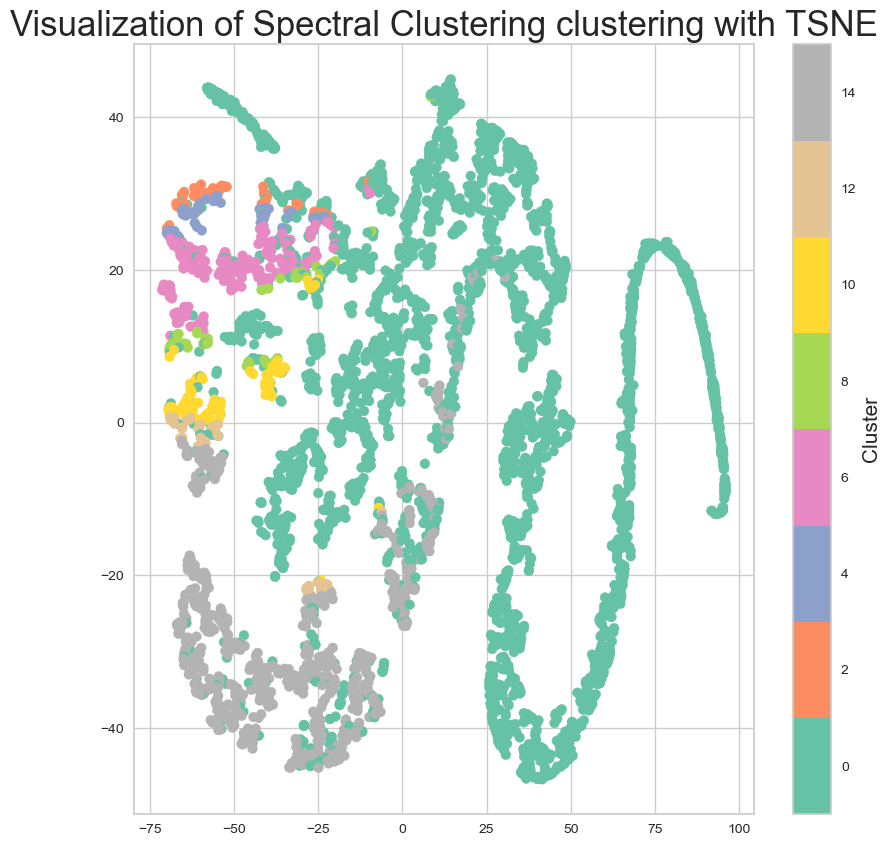

In [92]:
tsne = TSNE(n_components=2)
proj = tsne.fit_transform(df)

cmap = plt.get_cmap("Set2")

plt.figure(figsize=(10, 10))
plt.scatter(proj[:, 0], proj[:, 1], c=clusters, cmap=cmap)
plt.title("Visualization of Spectral Clustering clustering with TSNE", fontsize=25)
cbar = plt.colorbar()
cbar.set_label("Cluster", fontsize=15)

plt.show()


## Gaussian Mixture Model

**Silhouette score for range(2,12)**

In [93]:
K = range(2, 12)
sil_gauss = []
for k in K:
    clustering = GaussianMixture(n_components=k, random_state=42)
    clustering.fit(X1)
    clusters = clustering.predict(X1)
    score = silhouette_score(X1, clusters)
    print(f"Silhouette Score for {k} clusters: {score}")
    sil_gauss.append(score)


Silhouette Score for 2 clusters: 0.29752597328128016
Silhouette Score for 3 clusters: 0.2107091674593185
Silhouette Score for 4 clusters: 0.08574798249748151
Silhouette Score for 5 clusters: 0.11611786011189917
Silhouette Score for 6 clusters: 0.04054762295256421
Silhouette Score for 7 clusters: -0.005485711619414699
Silhouette Score for 8 clusters: -0.033131898059758615
Silhouette Score for 9 clusters: -0.03186926895469556
Silhouette Score for 10 clusters: -0.02282255456088504
Silhouette Score for 11 clusters: 0.07404887617339995


**Plot Silhouette scores for each K**

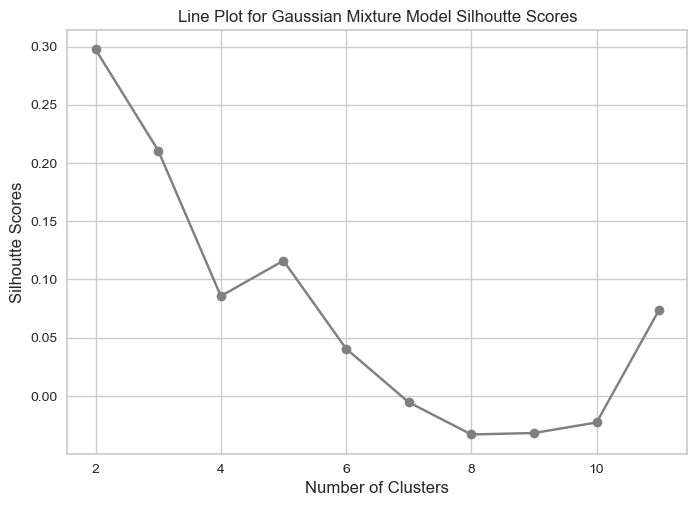

In [94]:
x_values = range(2, 12)

plt.plot(x_values, sil_gauss, marker="o", linestyle="-", color="grey")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhoutte Scores")
plt.title("Line Plot for Gaussian Mixture Model Silhoutte Scores")
plt.show()


In [95]:
gmm = GaussianMixture(n_components=4, random_state=42)
gmm.fit(X1)
clusters = gmm.predict(X1)
print("Cluster Assignments:", clusters)
score = silhouette_score(X1, clusters)
print(f"Silhouette Score for {4} clusters: {silhouette_score(X1 , clusters)}")


Cluster Assignments: [0 0 2 ... 1 1 1]
Silhouette Score for 4 clusters: 0.08574798249748151


**Display number of customers per cluster**

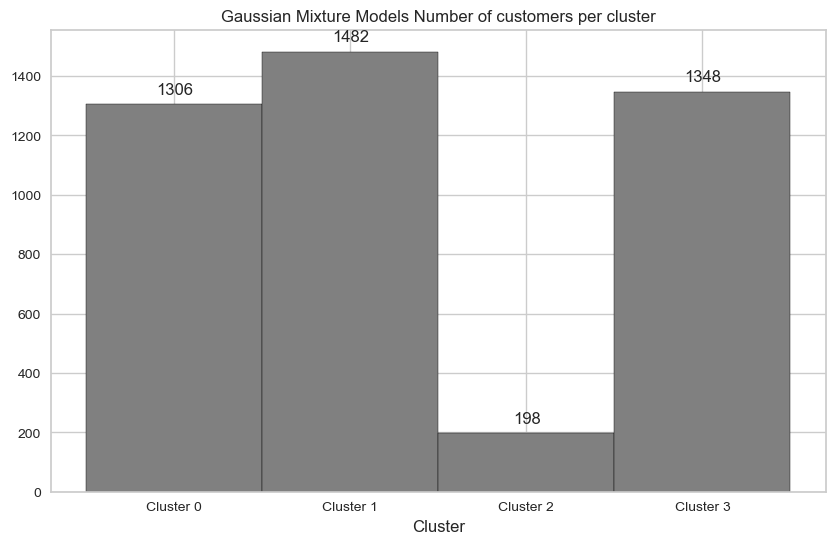

In [96]:
plt.figure(figsize=(10, 6))

n, bins, patches = plt.hist(
    clusters, bins=4, align="mid", color="grey", edgecolor="black"
)

plt.xlabel("Cluster")
plt.title("Gaussian Mixture Models Number of customers per cluster")
plt.xticks(
    [rect.get_x() + rect.get_width() / 2 for rect in patches],
    ["Cluster {}".format(x) for x in range(4)],
)

for rect in patches:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2

    space = 5
    va = "bottom"
    label = str(int(y_value))

    plt.annotate(
        label,
        (x_value, y_value),
        xytext=(0.2, space),
        textcoords="offset points",
        ha="center",
        va=va,
    )

plt.show()


In [97]:
df["cluster"] = clusters
df


,min_recency,max_recency,frequency,monetary_value,cluster
CustomerID,,,,,
17850,372.0,373.0,34,5322.84,0
13047,56.0,373.0,9,3105.70,0
12583,2.0,373.0,15,6690.18,2
13748,95.0,373.0,5,948.25,0
15100,333.0,373.0,3,843.15,0
...,...,...,...,...,...
13436,1.0,1.0,1,196.89,1
15520,1.0,1.0,1,343.50,1
13298,1.0,1.0,1,360.00,1


**Display the summary statistics**

In [98]:
summary = df.groupby("cluster")["min_recency"].describe()
print(summary)
print()
summary = df.groupby("cluster")["frequency"].describe()
print(summary)
print()
summary = df.groupby("cluster")["monetary_value"].describe()
print(summary)


          count        mean         std  min   25%    50%    75%    max
cluster                                                                
0        1306.0   93.882083   90.024406  0.0  16.0   64.0  156.0  373.0
1        1482.0  155.953441  115.715033  0.0  51.0  130.5  261.0  373.0
2         198.0    8.464646    9.143873  0.0   2.0    4.0   11.0   45.0
3        1348.0   32.869436   25.805236  0.0  11.0   25.0   50.0  109.0

          count       mean        std  min   25%   50%   75%    max
cluster                                                            
0        1306.0   5.656968   3.591638  1.0   2.0   5.0   8.0   34.0
1        1482.0   1.000000   0.000000  1.0   1.0   1.0   1.0    1.0
2         198.0  26.424242  24.350483  3.0  16.0  20.0  28.0  206.0
3        1348.0   3.191395   1.209533  2.0   2.0   3.0   4.0    7.0

          count          mean           std      min        25%       50%  \
cluster                                                                     
0   

**TSNE for Gaussian Mixture Model**

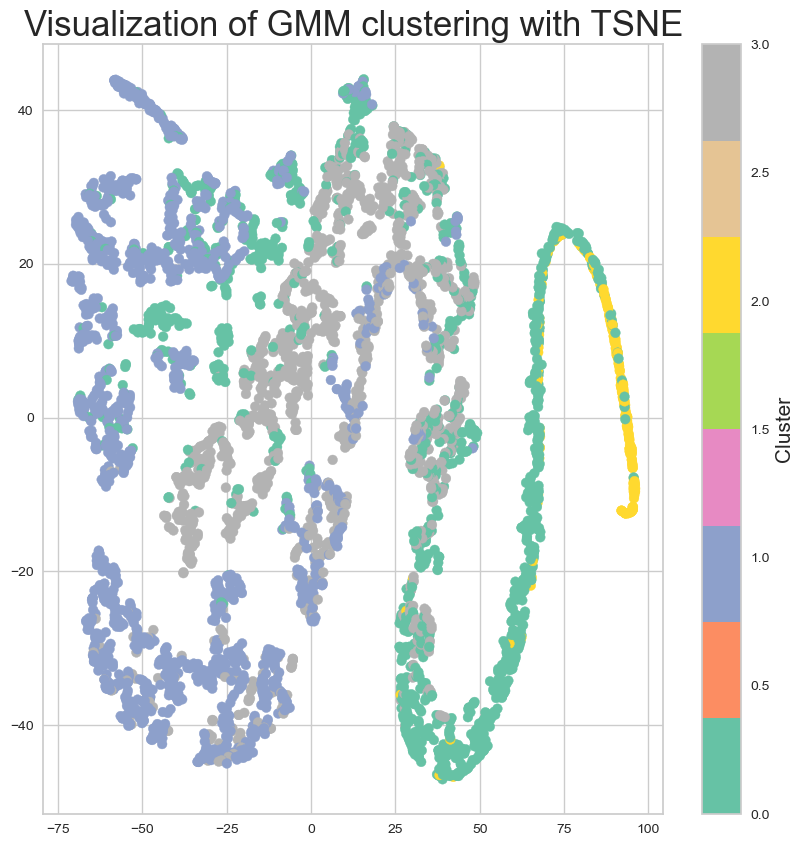

In [99]:
tsne = TSNE(n_components=2)
proj = tsne.fit_transform(df)

cmap = plt.get_cmap("Set2")
plt.figure(figsize=(10, 10))
plt.scatter(proj[:, 0], proj[:, 1], c=clusters, cmap=cmap)
plt.title("Visualization of GMM clustering with TSNE", fontsize=25)
cbar = plt.colorbar()
cbar.set_label("Cluster", fontsize=15)

plt.show()


# Evaluation

**Plot all silhouette scores**

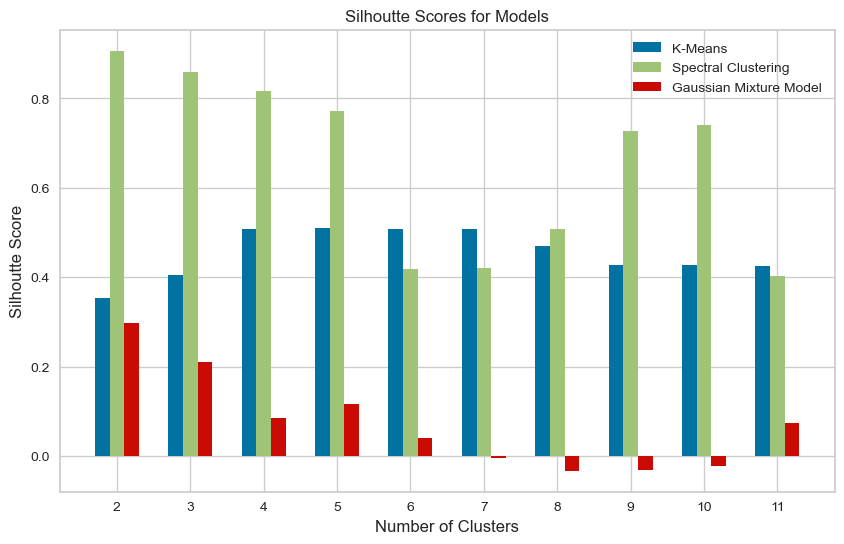

In [100]:
x_values = range(2, 12)

# Plot the three lists as bars in the same figure
plt.figure(figsize=(10, 6))
plt.bar(x_values, sil, width=0.2, label="K-Means", align="center")
plt.bar(
    [x + 0.2 for x in x_values],
    sil_spectral,
    width=0.2,
    label="Spectral Clustering",
    align="center",
)
plt.bar(
    [x + 0.4 for x in x_values],
    sil_gauss,
    width=0.2,
    label="Gaussian Mixture Model",
    align="center",
)

plt.xlabel("Number of Clusters")
plt.ylabel("Silhoutte Score")
plt.title("Silhoutte Scores for Models")
plt.xticks([x + 0.2 for x in x_values], x_values)
plt.legend()
plt.show()
